In [2]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.casedeck import*
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *
from hermes3.balance1d import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-03_updated_glimmer/32_core_cold_start_cvode

In [3]:
df = Load.case_1D(f'/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-03_updated_glimmer/32_core_cold_start_cvode', guard_replace = False, use_squash=True)

- Looking for squash file
- Squash file found. squash date 04/07/2025, 21:49:36, dmp file date 04/07/2025, 21:17:26
Skipping unnormalisation


In [9]:
for i in df.ds.data_vars:
    print(i)

Bxy
Ed+_iz
Ed+_rec
Ed_target_recycle
Edd+_cx
Fd+_iz
Fd+_rec
Fdd+_cx
G1
G2
G3
J
Kd+_cond
Kd_cond
Kdd+_cx
Ke_cond
NVd
NVd+
Nd
Nd+
Ne
Pd
Pd+
Pd+_src
Pd_src
Pe
Pe_src
Rd+_ex
Rd+_rec
Rneon
SNVd
SNVd+
SNd
SNd+
SPd
SPd+
SPe
Sd+_feedback
Sd+_iz
Sd+_rec
Sd+_src
Sd_src
Sd_target_recycle
Td
Td+
Te
Vd
Vd+
Ve
cvode_last_order
cvode_last_step
cvode_nfevals
cvode_nliters
cvode_nniters
cvode_nonlin_fails
cvode_npevals
cvode_nsteps
cvode_num_fails
cvode_stab_lims
ddt(NVd)
ddt(NVd+)
ddt(Nd)
ddt(Nd+)
ddt(Pd)
ddt(Pd+)
ddt(Pe)
density_feedback_src_i_d+
density_feedback_src_mult_d+
density_feedback_src_p_d+
density_feedback_src_shape_d+
div_cond_par_d
div_cond_par_d+
div_cond_par_e
efd+_cond_ylow
efd+_kin_ylow
efd+_tot_ylow
efd_cond_ylow
efd_kin_ylow
efd_tot_ylow
efe_cond_ylow
efe_kin_ylow
efe_tot_ylow
g11
g12
g13
g22
g23
g33
g_11
g_12
g_13
g_22
g_23
g_33
kappa_par_d
kappa_par_d+
kappa_par_e
pfd+_tot_ylow
pfd_tot_ylow
simple_pump_sink_d
simple_pump_src_shape_d
ncalls
ncalls_e
ncalls_i
t_array
da
dv


In [16]:
print(df.ds['Fd+_iz'])

<xarray.DataArray 'Fd+_iz' (t: 19, pos: 804)>
dask.array<getitem, shape=(19, 804), dtype=float64, chunksize=(19, 804), chunktype=numpy.ndarray>
Coordinates:
    dx       (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    dy       (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    dz       (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
  * t        (t) float64 0.05899 0.05999 0.06099 ... 0.07499 0.07599 0.07699
    y        (pos) float64 0.09755 0.2925 0.4873 0.6818 ... 82.38 82.4 82.41
  * pos      (pos) float64 -0.2924 -0.09737 0.09737 0.2919 ... 81.99 82.01 82.02
Attributes:
    current_time_index:  19
    cell_location:       CELL_CENTRE
    conversion:          156807.45327764665
    direction_y:         Standard
    direction_z:         Standard
    long_name:           Momentum transfer due to ionisation of d to d+
    source:              amjuel_hyd_ionisation
    standard_name:       momentum transfer
    time_dimension:      t
    units: 

KeysView(<xarray.Dataset>
Dimensions:                        (pos: 804)
Coordinates:
    dx                             (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    dy                             (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    dz                             (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    t                              float64 0.07699
    y                              (pos) float64 0.09755 0.2925 ... 82.4 82.41
  * pos                            (pos) float64 -0.2924 -0.09737 ... 82.02
Data variables: (12/107)
    Bxy                            (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    Ed+_iz                         (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    Ed+_rec                        (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    Ed_target_recycle              (pos) float64 dask.array<chunksize=(804,), meta=np.ndarray>
    Edd+_cx        

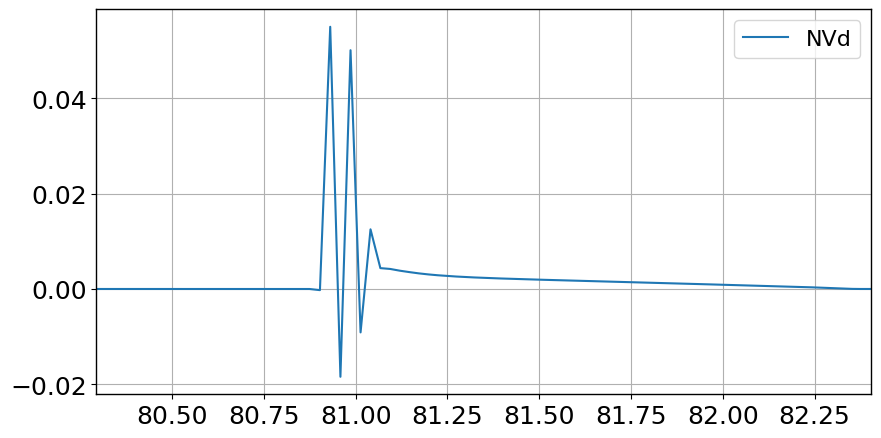

In [4]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

print(df.ds.isel(t = -1).keys())


ax.plot(df.ds.isel(t = -1)['y'], df.ds.isel(t=-1)['NVd'], label = 'NVd')

ax.set_xbound(df.ds['y'][-100], df.ds['y'][-1])
ax.legend()

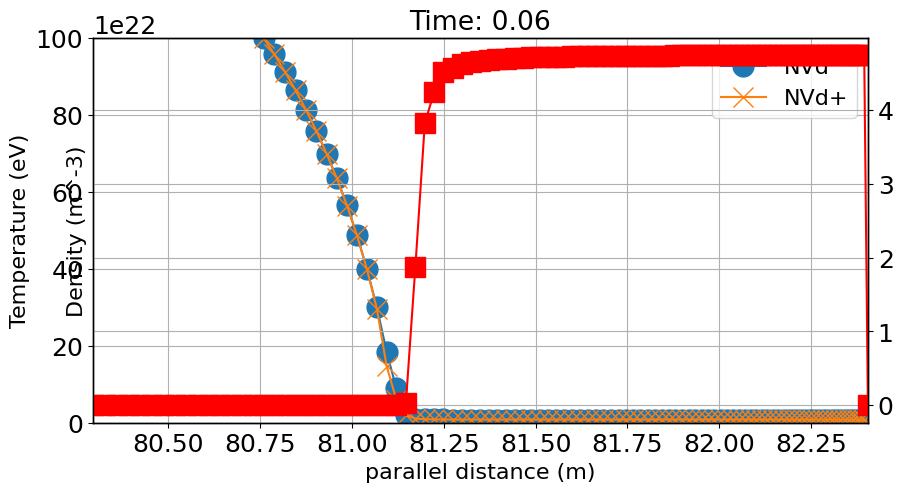

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.animation import FuncAnimation

# Assume df is your DataFrame and already loaded with data

# Prepare the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax2 = ax.twinx()  # Create a twin Axes sharing the x-axis

# Define the update function for the animation
def update(frame):
    ax.clear()
    ax2.clear()
    
    # Plot the data at time frame
    ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)['Td+'], label='NVd', marker='o', markersize=markersize)
    ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)['Td'], label='NVd+', marker='x', markersize=markersize)
    ax2.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)['Nd'], label='NVd', marker='s', markersize=markersize, color = 'red')
    # print(min(df.ds.isel(t=frame)['Nd']), max(df.ds.isel(t=frame)['Nd']))
    # Set the x-bound for the last 100 points
    
    # Set the fixed x and y bounds (constant limits)
    ax.set_xlim(df.ds['y'][-100], df.ds['y'][-1])  # Fix x-axis limits
    # ax.set_ylim(np.min(df.ds['NVd'].values)*1.2, np.max(df.ds['NVd'].values)*1.2)  # Fix y-axis limits
    ax.set_ylim(0, 100)
    ax.set_title(f"Time: {df.ds.t[frame].values:.2f}")
    ax.set_xlabel('parallel distance (m)')
    ax.set_ylabel('Temperature (eV)')
    ax2.set_ylabel('Density (m^-3)')
    ax.legend()

# Create an animation object
ani = FuncAnimation(fig, update, frames=len(df.ds.t), repeat=False)

# Save the animation as a GIF
ani.save('animation.gif', writer='imagemagick', fps=1)


Peak index: 734 | Te (eV): 1.0886151766066823
Peak index: 734 | Te (eV): 1.0886151766066823
Peak index: 735 | Te (eV): 0.8702840334212737
Peak index: 733 | Te (eV): 1.0602233676483581
Peak index: 734 | Te (eV): 0.868784184946779
Peak index: 733 | Te (eV): 0.8871013682127022
Peak index: 731 | Te (eV): 1.2208920873532347
Peak index: 732 | Te (eV): 0.8838861692886011
Peak index: 730 | Te (eV): 1.2165006978183175
Peak index: 731 | Te (eV): 0.8824157186613757
Peak index: 731 | Te (eV): 0.8677817022918581
Peak index: 730 | Te (eV): 0.8849783747458722
Peak index: 730 | Te (eV): 0.8678844507521785
Peak index: 728 | Te (eV): 1.06471965928794
Peak index: 729 | Te (eV): 0.8700721456282553
Peak index: 727 | Te (eV): 1.0917600899543958
Peak index: 728 | Te (eV): 0.871578799930998
Peak index: 726 | Te (eV): 1.1361969983613565
Peak index: 727 | Te (eV): 0.879301715996416
Peak index: 725 | Te (eV): 1.187461359391196
Peak index: 734 | Te (eV): 1.0886151766066823


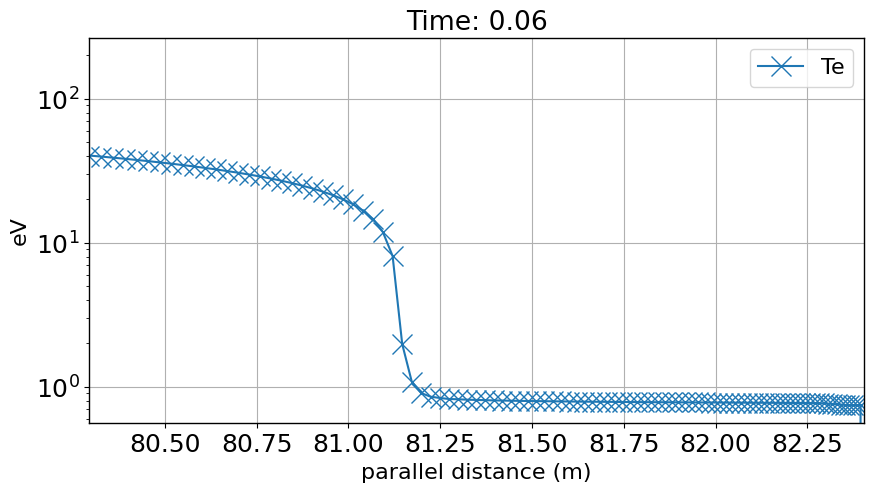

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.animation import FuncAnimation

# Assume df is your DataFrame and already loaded with data

# Prepare the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ax2 = ax.twinx()  # Create a twin Axes sharing the x-axis

param = 'Te'

peak_NVd = []

# Define the update function for the animation
def update(frame):
    ax.clear()
    # ax2.clear()
    
    # Plot the data at time frame
    # ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)['Td+'], label='NVd', marker='o', markersize=markersize)
    ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)[param], label=f'{param}', marker='x', markersize=markersize)
    # ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)[param], label=f'{param}', marker='x', markersize=markersize)
    # ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)[param], label=f'{param}', marker='x', markersize=markersize)

    # ax2.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)['Nd'], label='NVd', marker='s', markersize=markersize, color = 'red')
    # print(min(df.ds.isel(t=frame)['Nd']), max(df.ds.isel(t=frame)['Nd']))
    # Set the x-bound for the last 100 points

    print('Peak index:',np.argmax(df.ds.isel(t=frame)['NVd'].values), f'| {param} ({df.ds.isel(t=frame)[param].units}):' ,df.ds.isel(t=frame)[param].values[np.argmax(df.ds.isel(t=frame)['NVd'].values)])

    
    peak_NVd.append(np.argmax(df.ds.isel(t=frame)[param].values))
    # Set the fixed x and y bounds (constant limits)
    ax.set_xlim(df.ds['y'][-100], df.ds['y'][-1])  # Fix x-axis limits
    # ax.set_ylim(np.min(df.ds['NVd'].values)*1.2, np.max(df.ds['NVd'].values)*1.2)  # Fix y-axis limits
    # ax.set_ylim(0, 100)
    ax.set_title(f"Time: {df.ds.t[frame].values:.2f}")
    ax.set_xlabel('parallel distance (m)')
    ax.set_ylabel(df.ds.isel(t=frame)[param].units)
    if np.max(df.ds[param]) > 1e1:
        ax.set_yscale('log')
    # ax2.set_ylabel('Density (m^-3)')
    ax.legend()

# Create an animation object
ani = FuncAnimation(fig, update, frames=len(df.ds.t), repeat=False)

# Save the animation as a GIF
ani.save(f'{param}.gif', writer='imagemagick', fps=1)


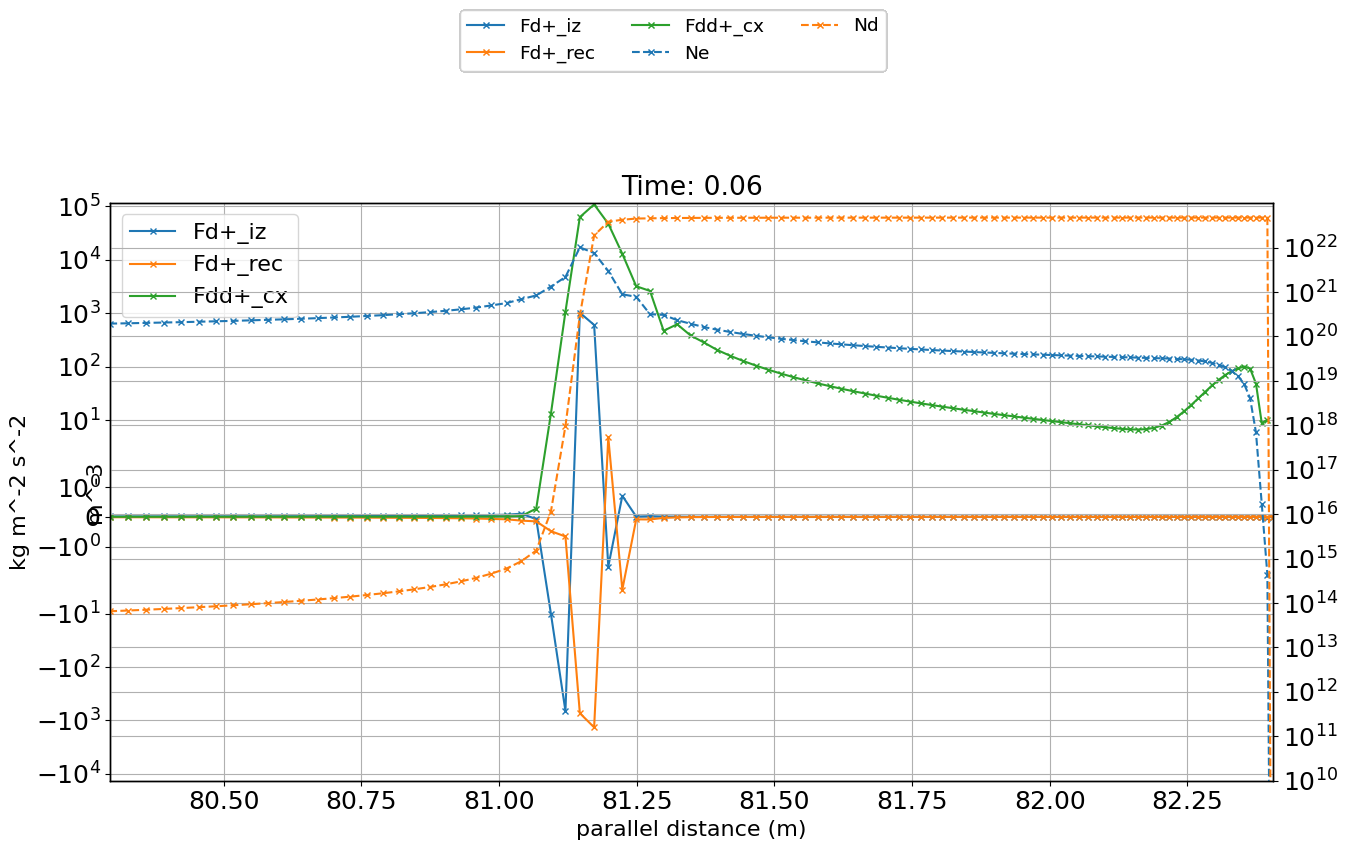

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.animation import FuncAnimation

# Assume df is your DataFrame and already loaded with data

# Prepare the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5))
ax2 = ax.twinx()  # Create a twin Axes sharing the x-axis

param = ['Fd+_iz', 'Fd+_rec', 'Fdd+_cx']
param2 = ['Ne', 'Nd']

peak_NVd = []

# Define the update function for the animation
def update(frame):
    ax.clear()
    ax2.clear()
    # ax2.clear()
    ylabel = []
    ylabel2 = []
    
    for i in param:
        ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)[i], label=f'{i}', marker='x', markersize=5)
        ylabel.append(df.ds.isel(t=frame)[i].units)

    for i in param2:
        ax2.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)[i], label=f'{i}', marker='x', markersize=5, linestyle='--')
        ylabel2.append(df.ds.isel(t=frame)[i].units)

    # ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)[param], label=f'{param}', marker='x', markersize=markersize)
    # ax.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)[param], label=f'{param}', marker='x', markersize=markersize)

    # ax2.plot(df.ds.isel(t=frame)['y'], df.ds.isel(t=frame)['Nd'], label='NVd', marker='s', markersize=markersize, color = 'red')
    # print(min(df.ds.isel(t=frame)['Nd']), max(df.ds.isel(t=frame)['Nd']))
    # Set the x-bound for the last 100 points

    # print('Peak index:',np.argmax(df.ds.isel(t=frame)['NVd'].values), f'| {param} ({df.ds.isel(t=frame)[param].units}):' ,df.ds.isel(t=frame)[param].values[np.argmax(df.ds.isel(t=frame)['NVd'].values)])

    
    # peak_NVd.append(np.argmax(df.ds.isel(t=frame)[param].values))
    # Set the fixed x and y bounds (constant limits)
    ax.set_xlim(df.ds['y'][-100], df.ds['y'][-1])  # Fix x-axis limits
    # ax.set_ylim(np.min(df.ds['NVd'].values)*1.2, np.max(df.ds['NVd'].values)*1.2)  # Fix y-axis limits
    # ax.set_ylim(0, 100)
    ax.set_title(f"Time: {df.ds.t[frame].values:.2f}")
    ax.set_xlabel('parallel distance (m)')
    # ax.set_ylabel(df.ds.isel(t=frame)[param].units)
    ax.set_ylabel(ylabel[0])
    ax2.set_ylabel(ylabel2[0])
    ax2.set_ylim(1e10, 1e23)

    
    if np.max(df.ds[param]) > 1e1:
        ax.set_yscale('symlog')
        ax2.set_yscale('symlog')
    # ax2.set_ylabel('Density (m^-3)')
    # ax.legend(param + param2, loc = 'upper left')
    # ax2.legend(loc = 'upper right')


    fig.legend(param + param2,loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize='small')
# Create an animation object
ani = FuncAnimation(fig, update, frames=len(df.ds.t), repeat=False)

# Save the animation as a GIF
ani.save(f'{param}.gif', writer='imagemagick', fps=1)


In [7]:
import imageio

# Read the GIF file
gif_reader = imageio.get_reader('animation.gif')

# Write the MP4 file
with imageio.get_writer('animation.mp4', fps=1) as writer:
    for frame in gif_reader:
        writer.append_data(frame)


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x746c880] Warning: data is not aligned! This can lead to a speed loss
